<a href="https://colab.research.google.com/github/FlavioAugusty/Dojo---Hype/blob/exerc%C3%ADcios/exerc%C3%ADcios/Projeto_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montando Google drive e importando bibliotecas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report

# Análise exploratória com gráficos e medidas descritivas pertinentes

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000    

Não possuimos valores nulos

In [ ]:
df['Species'].value_counts()


,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


<Axes: xlabel='Species', ylabel='Count'>

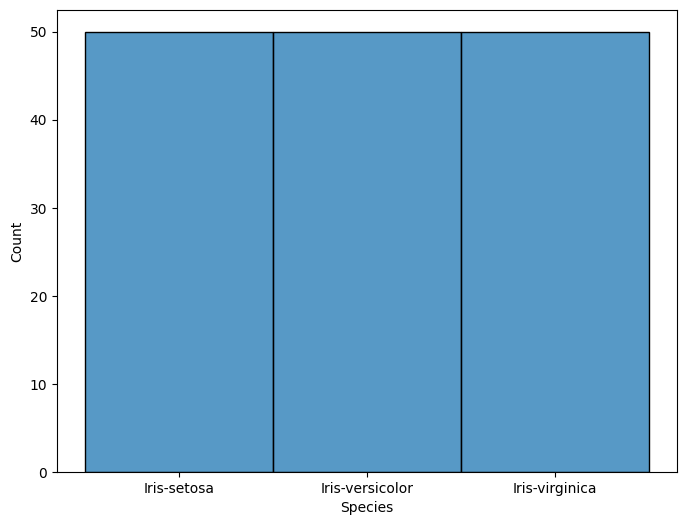

In [ ]:
plt.figure(figsize = (8, 6))
sns.histplot(data=df, x='Species')

Como podemos conferir, a distribuição das espécies está separada de maneira uniforme.

# Identificação das melhores variáveis para o modelo

Text(0.5, 1.0, 'Heatmap')

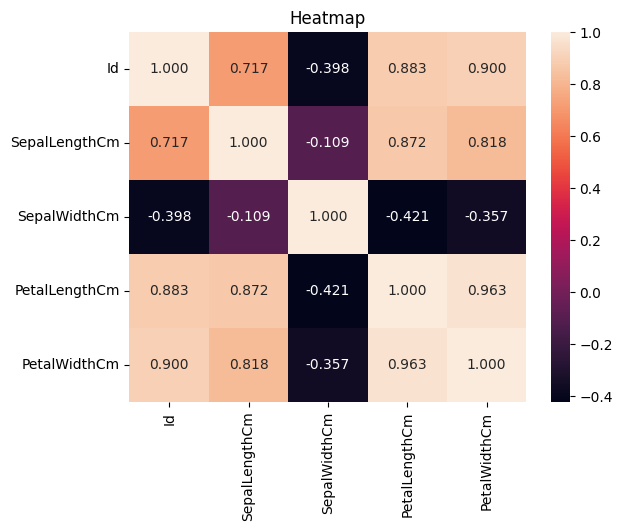

In [ ]:
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot = True, fmt=".3f")
plt.title ('Heatmap')

In [ ]:
df_model = df.drop(['Id'], axis = 1)


Dropamos o Id, pois a numeração não deve influenciar nos resultados de predição.

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5, 1.0, 'Heatmap com Species')

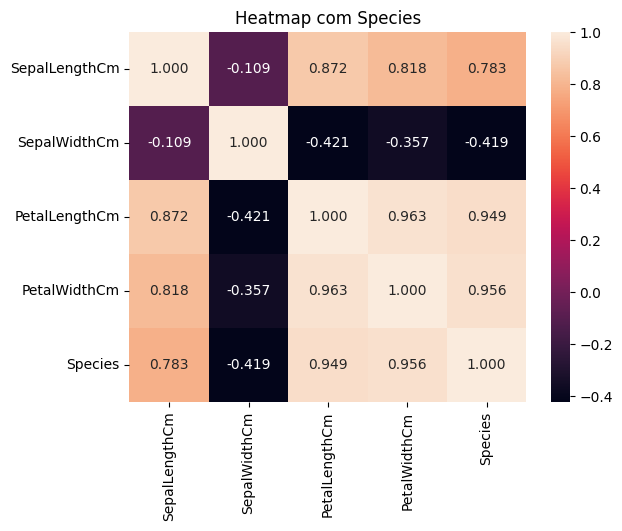

In [ ]:
# Convertendo a coluna 'Species' para valores numéricos
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_model['Species'] = le.fit_transform(df_model['Species'])

# Gerando o heatmap com a coluna 'Species'
df_model.corr(numeric_only=True)
sns.heatmap(df_model.corr(numeric_only=True), annot = True, fmt=".3f")
plt.title ('Heatmap com Species')


In [ ]:
x = df_model.drop('Species', axis = 1)
y = df_model['Species']


x: Contém os dados de entrada, ou seja, todas as colunas exceto 'Species'.

y: Contém os rótulos de saída (ou alvo), que são os valores da coluna 'Species' que o modelo de machine learning tentará prever.

# Divisão entre treino e teste

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Aplicação de um algoritmo de ML

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

- A primeira parte divide os dados entre treinamento e teste, com 70% dos dados usados para treinar o modelo e 30% para avaliá-lo.

- A segunda parte cria um classificador kNN que considera os 5 vizinhos mais próximos para classificar novos pontos de dados. O modelo é então treinado com os dados de treino (x_train, y_train).

# Métricas de avaliação

In [ ]:
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



  - knn.predict(x_test) faz as previsões para os dados de teste.
  
  - classification_report(y_test, y_pred) fornece uma análise detalhada do desempenho do modelo, incluindo precisão, recall, F1-score e outras métricas importantes, permitindo avaliar como o modelo se saiu em prever corretamente as classes.

Conferindo os resultados do nosso modelo, podemos ver que ele obteve 100% de acurácia em seus resultados, mesmo sem a utilização de um cross-validation (algo que eu inicialmente, não estava esperando).

# Hyperparmeter tunning

### Validação Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

# Aplicar Cross-Validation
cv_scores = cross_val_score(knn, x, y, cv=5, scoring='f1_macro')

# Imprimir as acurácias para cada uma das divisões (folds)
print("Acurácias em cada fold:", cv_scores)

# Imprimir a média das acurácias (desempenho geral)
print("Acurácia média com validação cruzada:", cv_scores.mean())


Acurácias em cada fold: [0.96658312 1.         0.93265993 0.96658312 1.        ]
Acurácia média com validação cruzada: 0.973165236323131


A validação cruzada em si já é um processo de "teste", o modelo foi treinado e avaliado várias vezes em diferentes partes dos dados. O resultado da função cross_val_score são esses "testes".

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Definir um espaço de busca mais amplo para o RandomizedSearchCV
param_dist = {
    'n_neighbors': np.arange(1, 31),   # Testar valores de n_neighbors entre 1 e 30
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']  # Incluir diferentes métricas de distância
}

# Configurar o RandomizedSearchCV para testar 10 combinações aleatórias
random_search = RandomizedSearchCV(knn, param_dist, n_iter=15, cv=5, scoring='accuracy', random_state=42)

# Ajustar o RandomizedSearchCV
random_search.fit(x, y)

# Exibir os melhores parâmetros encontrados
print("Melhores hiperparâmetros do Randomized Search:", random_search.best_params_)


Melhores hiperparâmetros do Randomized Search: {'weights': 'distance', 'n_neighbors': 10, 'metric': 'euclidean'}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir um espaço de busca mais restrito, baseado nos melhores parâmetros do Randomized Search
param_grid = {
    'n_neighbors': [random_search.best_params_['n_neighbors'] - 1,
                    random_search.best_params_['n_neighbors'],
                    random_search.best_params_['n_neighbors'] + 1],
    'weights': [random_search.best_params_['weights']],  # Focar no melhor 'weights' encontrado
    'metric': [random_search.best_params_['metric']]     # Focar na melhor métrica
}

# Configurar o GridSearchCV para refinar a busca
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Ajustar o GridSearchCV com base nos melhores parâmetros do Randomized Search
grid_search.fit(x, y)

# Exibir os melhores parâmetros após a refinação com o Grid Search
print("Melhores hiperparâmetros após Grid Search:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)


Melhores hiperparâmetros após Grid Search: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Melhor acurácia: 0.9866666666666667


- Randomized Search: O Randomized Search começa com uma busca ampla por várias combinações de hiperparâmetros. Ele testa um número limitado de combinações aleatórias dentro do espaço de busca que você definiu. Isso ajuda a encontrar uma boa região de parâmetros sem testar todas as combinações possíveis.

- Grid Search: Após o Randomized Search, você pode pegar os melhores valores encontrados e refinar a busca em torno desses valores com o Grid Search. A ideia aqui é reduzir o espaço de busca e testar combinações próximas às melhores encontradas no Randomized Search para obter uma otimização mais detalhada.

In [ ]:
# Obter o melhor modelo encontrado
best_knn = grid_search.best_estimator_

#modelo finaL
best_knn.fit(x_train, y_train)

# Usar o modelo final para previsões
y_pred = best_knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Resumo:

- Etapa 1 - Randomized Search: Explora um grande espaço de hiperparâmetros rapidamente.

- Etapa 2 - Grid Search: Refina a busca nas melhores combinações de parâmetros.

- Treinamento Final: Treina o modelo final com os melhores hiperparâmetros encontrados e o utiliza para previsões.

### Confusion Matrix

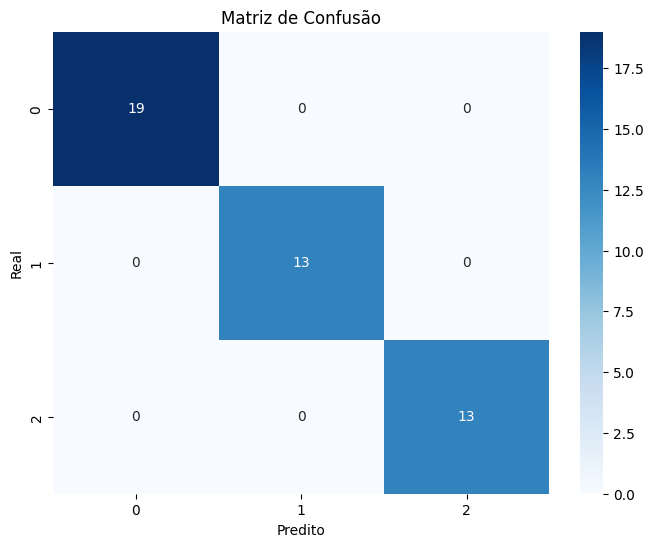

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Treinar o modelo com os melhores hiperparâmetros
best_knn.fit(x_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = best_knn.predict(x_test)

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão como gráfico de calor
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Adicionar rótulos e título
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Exibir o relatório de classificação para mais métricas
print(classification_report(y_test, y_pred))


**Na matriz de confusão:**

As linhas representam os valores reais (verdadeiros) das classes.
As colunas representam os valores preditos pelo modelo.
Cada célula contém o número de ocorrências em que o modelo fez uma previsão correta ou incorreta para cada classe.